<a href="https://colab.research.google.com/github/radageorgieva/Disease_Prediction/blob/main/ALF_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Useful Packages


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
import pandas as pd 
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.utils import resample
import time
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  RandomForestClassifier, VotingClassifier
from sklearn.svm import  SVC
from sklearn.neural_network import  MLPClassifier
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score
from sklearn.metrics import plot_confusion_matrix
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
with warnings.catch_warnings():
	# ignore all caught warnings
	warnings.filterwarnings("ignore")
	# execute code that will generate warning

# Setting fonts, graph themes and notebook options for inline plotting
font_1 = {'family': 'Arial', 'weight': 'normal', 'size': 15} # for axes
font_2 = {'family': 'Arial', 'weight': 'bold', 'size': 20} # for titles
cmap = plt.cm.Blues
colors = [cmap(i) for i in np.linspace(0.1,0.85,15)]
sns.set_style("whitegrid")


In [ ]:
show = True

# Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/My Drive/University, second semester of first year/ALF_Data.xlsx')
initial_shape = data.shape  

#### Look at Data

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8785.0,49.349915,18.831309,20.00,33.00,47.00,65.00,85.00
Weight,8591.0,79.100198,19.406975,25.60,65.40,76.80,89.55,193.30
Height,8594.0,167.028124,10.103450,130.40,159.70,166.60,174.20,200.10
Body Mass Index,8495.0,28.296022,6.184846,12.04,24.08,27.36,31.38,66.44
Obesity,8495.0,0.315951,0.464921,0.00,0.00,0.00,1.00,1.00
Waist,8471.0,96.845178,15.101170,58.50,86.20,96.30,106.10,173.40
Maximum Blood Pressure,8481.0,125.832213,21.046860,72.00,111.00,122.00,136.00,233.00
Minimum Blood Pressure,8409.0,71.516827,12.672351,10.00,64.00,72.00,79.00,132.00
Good Cholesterol,8768.0,51.822536,15.789131,8.00,41.00,49.00,60.00,160.00
Bad Cholesterol,8767.0,152.587544,42.976096,27.00,123.00,149.00,177.00,684.00


#### Describe Data


In [ ]:
sick = data.loc[data["ALF"] == 1].shape[0]
healthy = data.loc[data["ALF"] == 0].shape[0]
print(f"Proportion of sick to total: {sick/data.shape[0]}")

Proportion of sick to total: 0.052817302219692656


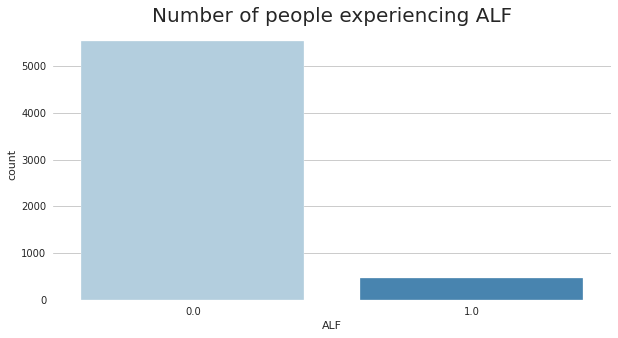

In [ ]:
fig = plt.figure(figsize = (10, 5))
ax = sns.countplot(data["ALF"], palette = "Blues")
plt.title("Number of people experiencing ALF", fontsize = 20)
plt.show()

#### Features Distribution

Plot of the distributions for continuous features, i.e.:
- Age
- Weight
- Height
- Body Mass Index'
- Waist
- Blood Pressure (max e min)
- Cholesterol (good bad e total)

For the moment, we are just dropping missing values in the representation

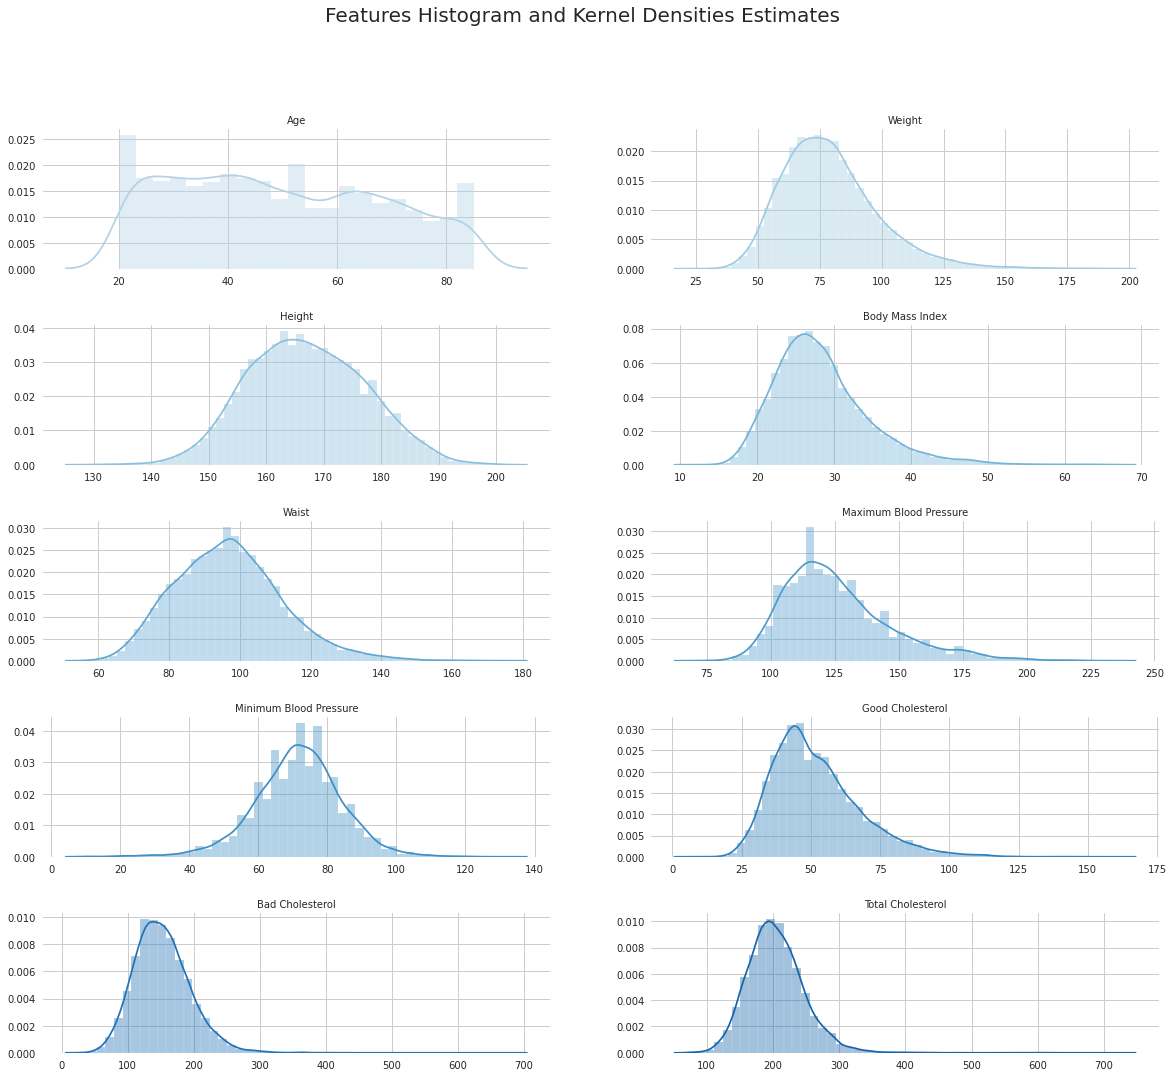

In [ ]:
nrows= 5
ncols= 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 17))
plt.subplots_adjust(hspace=0.4)
cont_features = data[['Age', 'Weight', 'Height', 'Body Mass Index',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol']]
for row in range(nrows):
    for col in range(ncols):
        i = ncols * row + col
        feature = cont_features.columns[i]
        sns.distplot(cont_features[feature].dropna(), hist=True, kde=True, rug=False, ax=ax[row,col], axlabel=False, color = colors[i+4])
        ax[row,col].set_title(label=feature, fontsize=10)
plt.suptitle('Features Histogram and Kernel Densities Estimates', fontsize = 20)
plt.show()

#### Distribution of Categorical Variables

We plot categorical variables according to ALF

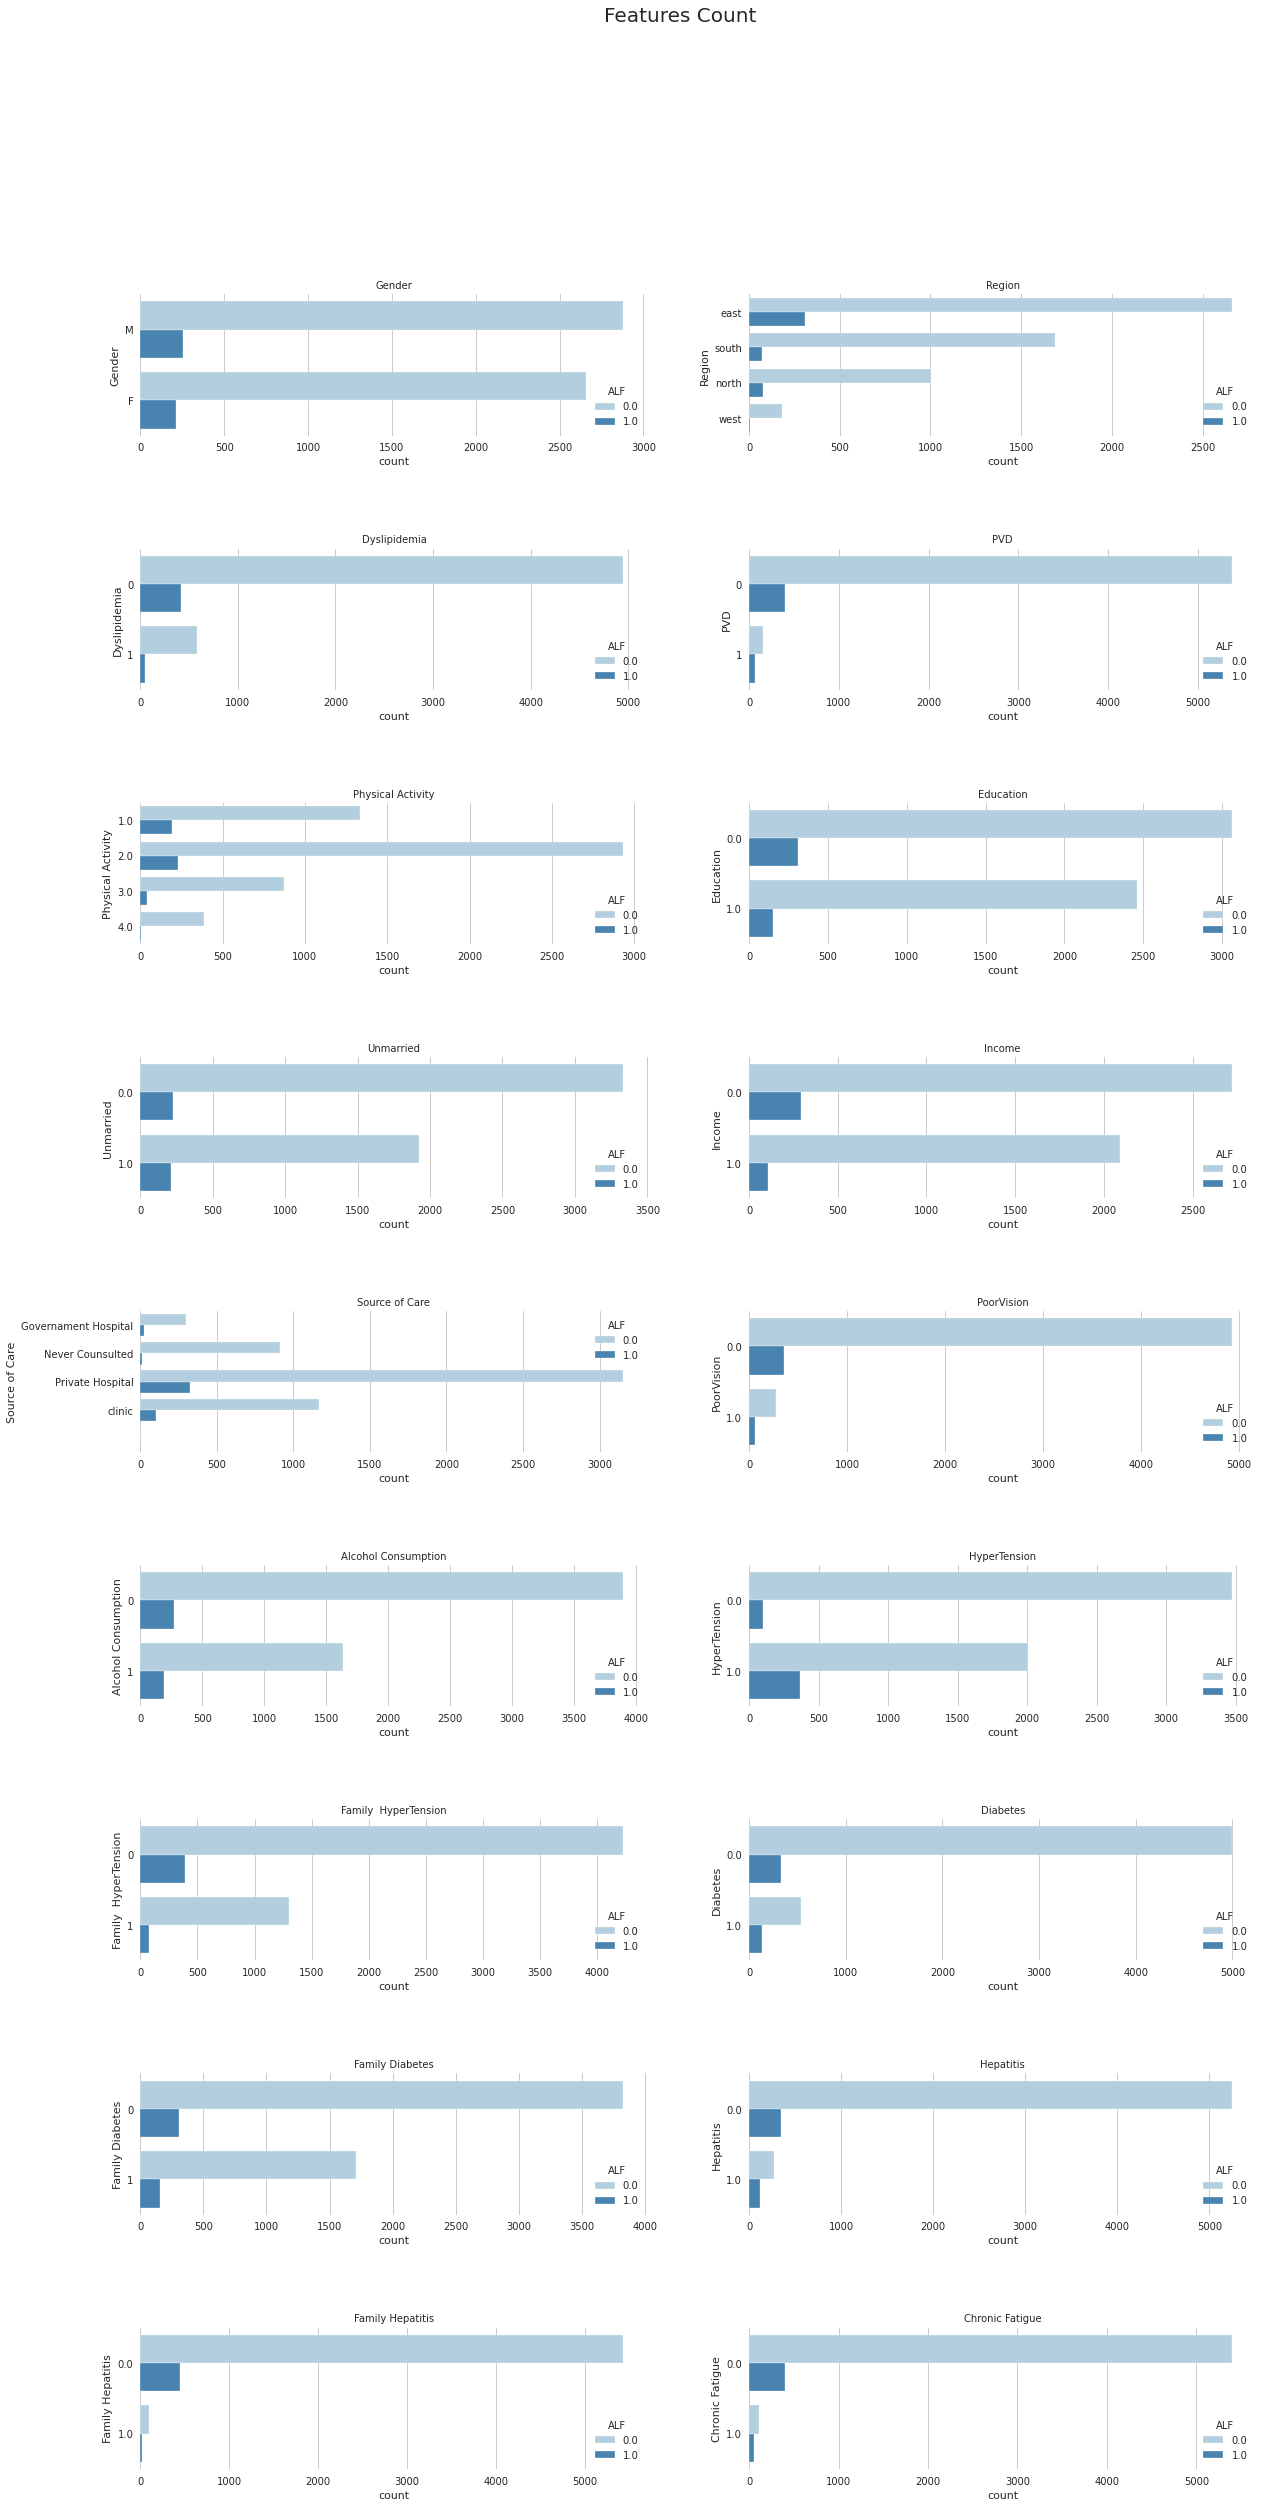

In [ ]:
binary_feat = data[['Gender', 'Region','Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried',
      'Income', 'Source of Care', 'PoorVision', 'Alcohol Consumption',
      'HyperTension', 'Family  HyperTension', 'Diabetes', 'Family Diabetes',
       'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue', "ALF"]]
nrows= 9
ncols= 2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
plt.subplots_adjust(hspace=0.8)

for row in range(nrows):
    for col in range(ncols):
        i = ncols * row + col
        feature = binary_feat.columns[i]
        sns.countplot(y = feature, hue = "ALF", data = binary_feat.dropna(subset = [feature]), palette = "Blues", ax = ax[row, col])
        ax[row,col].set_title(label=feature, fontsize=10)
      
plt.suptitle('Features Count', fontsize = 20)
plt.show()

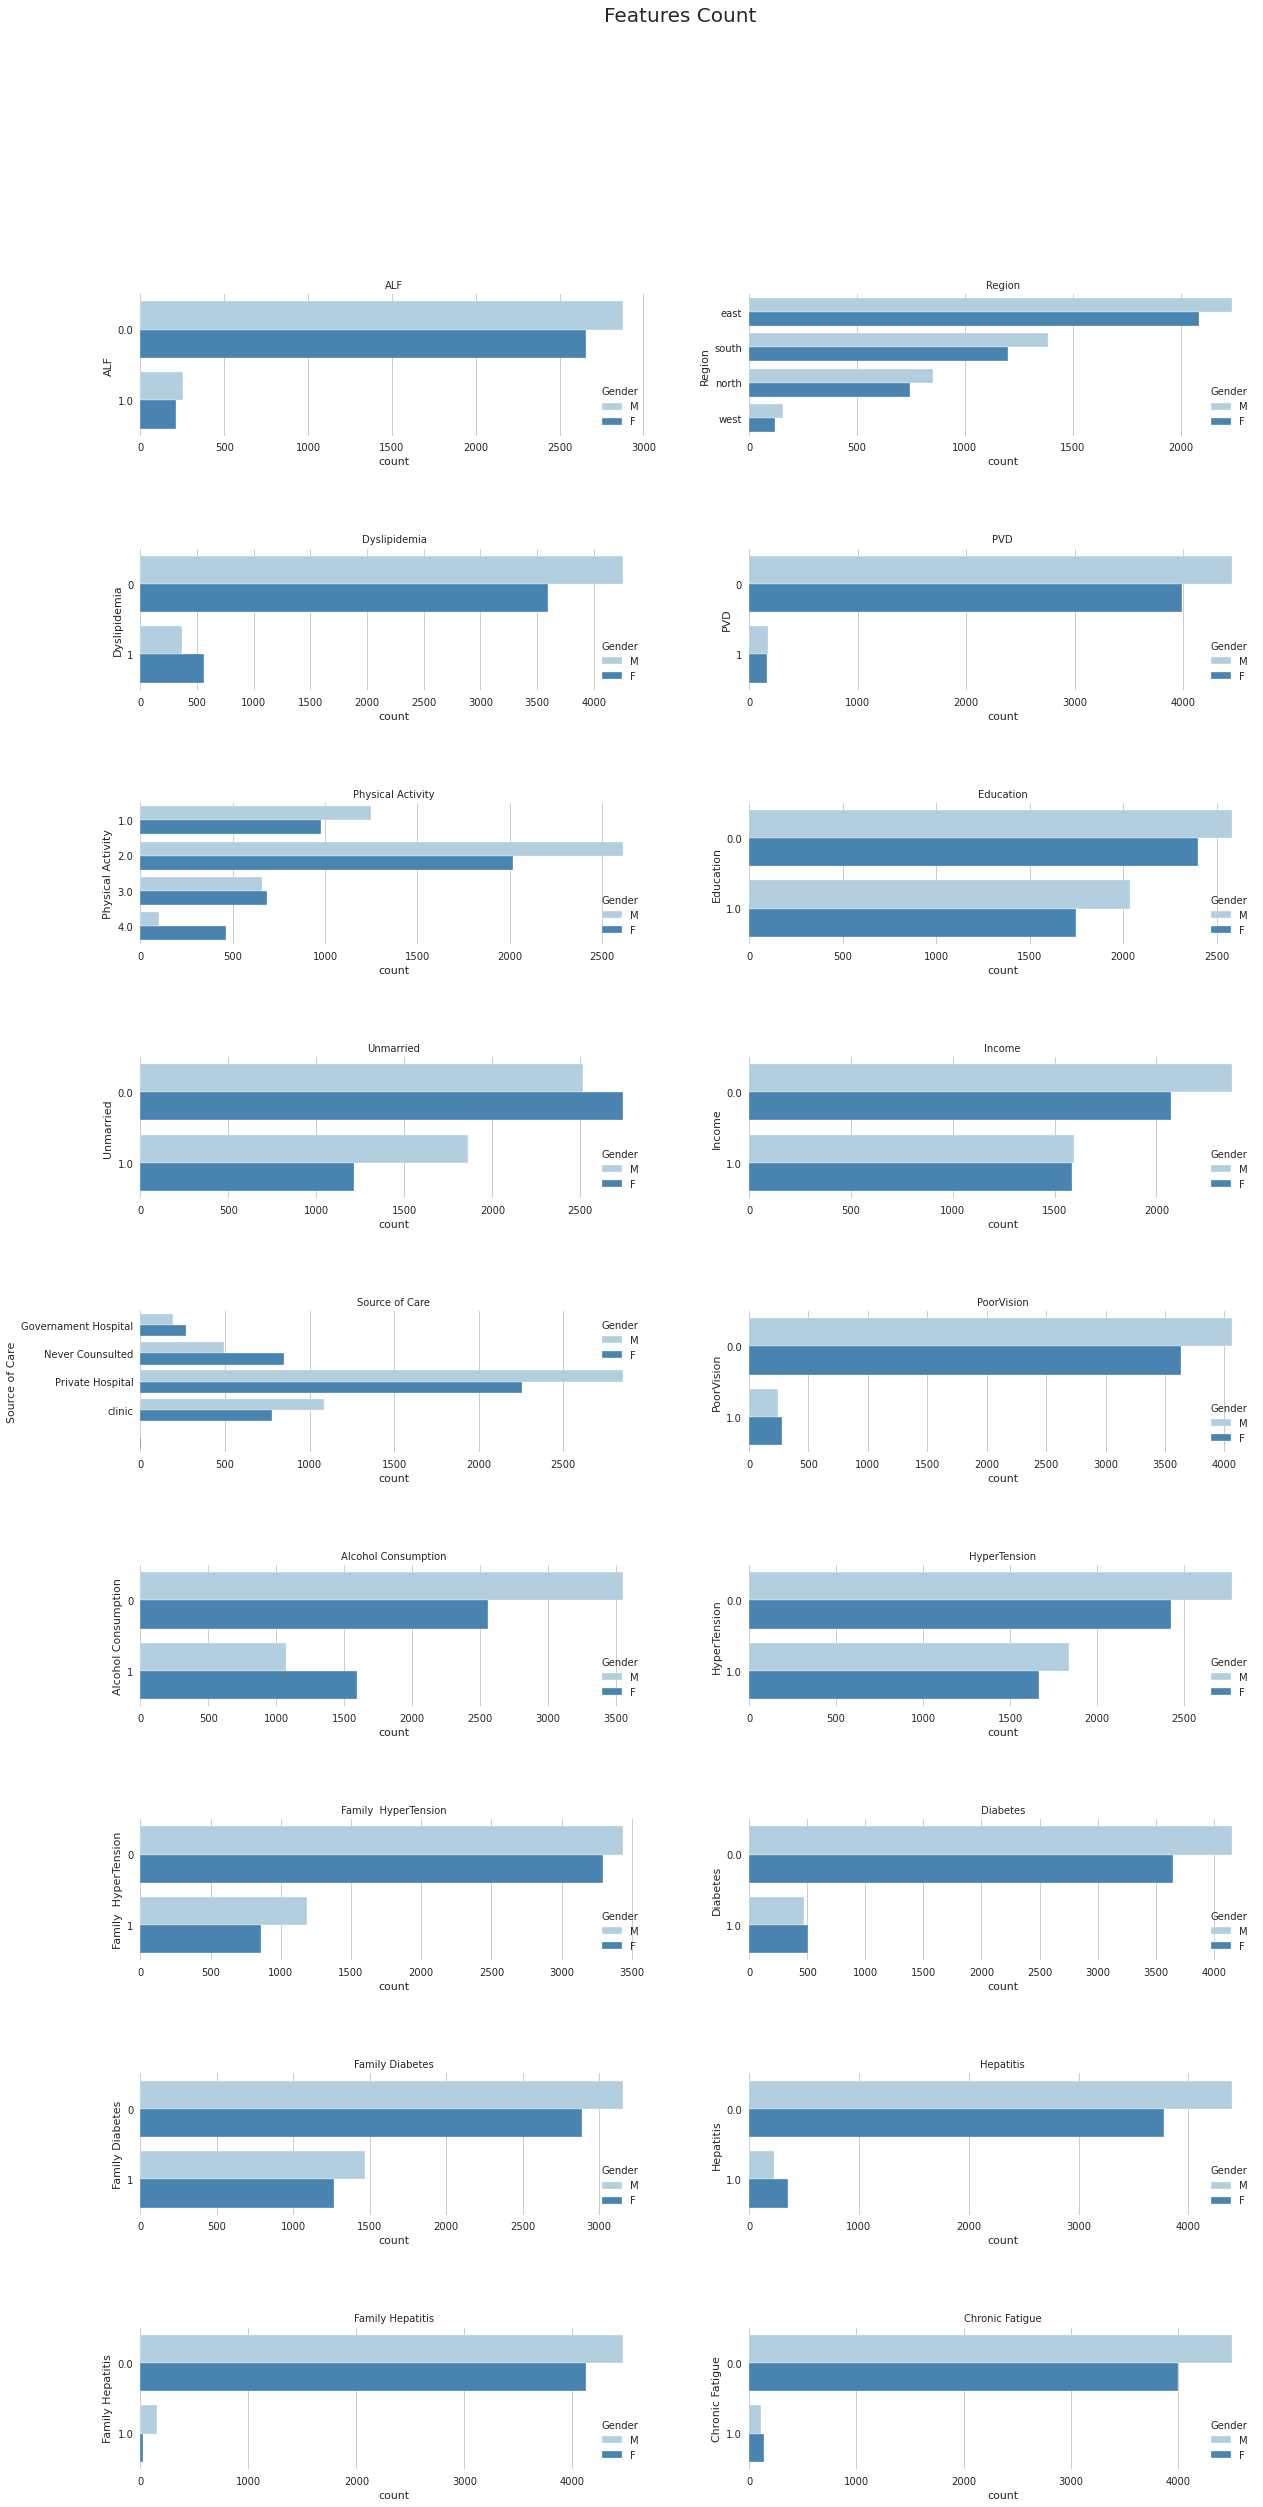

In [ ]:
binary_feat = data[['ALF', 'Region','Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried',
      'Income', 'Source of Care', 'PoorVision', 'Alcohol Consumption',
      'HyperTension', 'Family  HyperTension', 'Diabetes', 'Family Diabetes',
       'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue', "Gender"]]
nrows= 9
ncols= 2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
plt.subplots_adjust(hspace=0.8)

for row in range(nrows):
    for col in range(ncols):
        i = ncols * row + col
        feature = binary_feat.columns[i]
        sns.countplot(y = feature, hue = "Gender", data = binary_feat.dropna(subset = [feature]), palette = "Blues", ax = ax[row, col])
        ax[row,col].set_title(label=feature, fontsize=10)
      
plt.suptitle('Features Count', fontsize = 20)
plt.show()

#### Boxplots

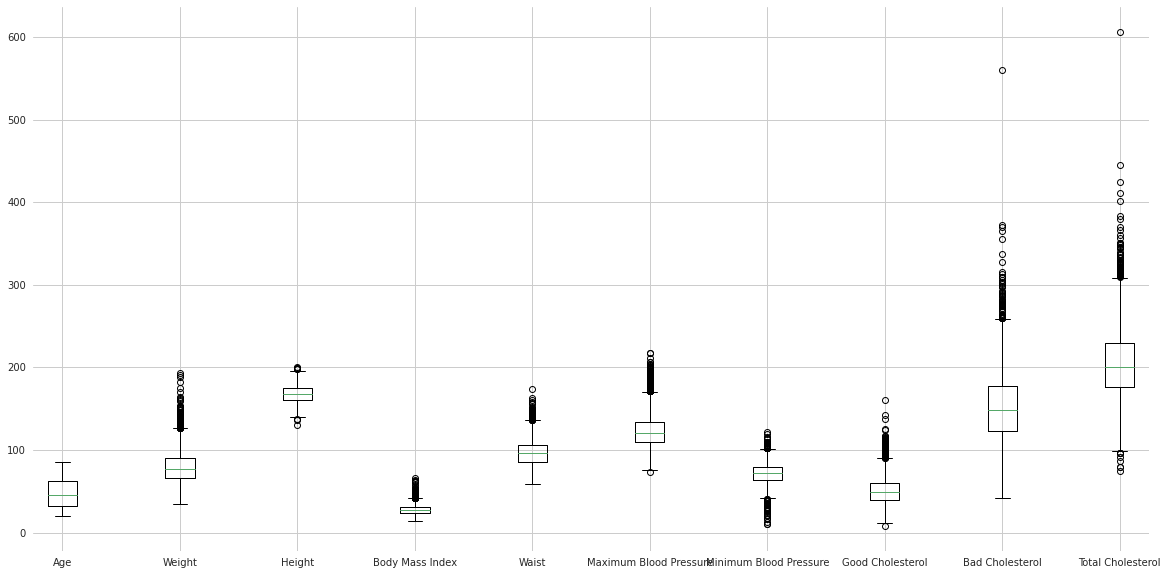

In [ ]:
init = 0
cont = ['Age', 'Weight', 'Height', 'Body Mass Index',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol']
dd = [data.dropna()[col] for col in cont]
ticks = [col for col in cont]
plt.figure(figsize = (20, 10))
plt.boxplot(dd, positions = np.arange(0, len(ticks) * 2, 2))

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.show()

In [ ]:
data_F = data[data["Gender"]=="F"]
sick_F = data_F.loc[data["ALF"] == 1].shape[0]
healthy_F = data_F.loc[data["ALF"] == 0].shape[0]
print(f"Proportion of sick women to total women: {sick_F/data_F.shape[0]}")

Proportion of sick women to total women: 0.05054151624548736


In [ ]:
data_M = data[data["Gender"]=="M"]
sick_M = data_M.loc[data["ALF"] == 1].shape[0]
healthy_M = data_M.loc[data["ALF"] == 0].shape[0]
print(f"Proportion of sick men to total men: {sick_M/data_M.shape[0]}")

Proportion of sick men to total men: 0.05485961123110151


#### Correlation matrix

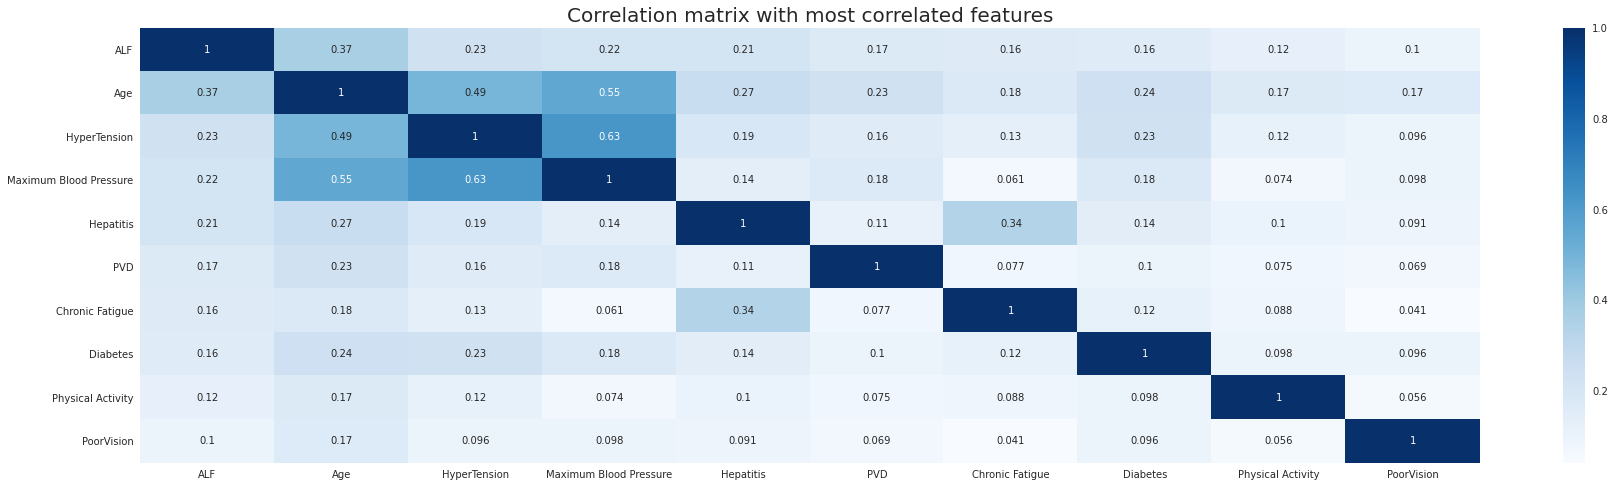

In [ ]:
corr = data.corr().abs()
target = corr["ALF"]
highest = target.sort_values(ascending = False)[:10].index
corr_highest = data[[ind for ind in highest]].corr().abs()


plt.figure(figsize=(30,8))
sns.heatmap(corr_highest, annot = True, cmap = cmap )
plt.title("Correlation matrix with most correlated features", fontsize = 20)
plt.show()

# Data Cleaning

#### Check how many datapoints have missing values

In [ ]:
initial = data.shape[0] - data.dropna().shape[0]
initial_perc = initial/data.shape[0]
print(f" The initial number of datapoints with at least one missing value is {initial}, which is {round(initial_perc*100)}%")

 The initial number of datapoints with at least one missing value is 4463, which is 51%


#### Remove Missing Values in Dependent Variable

In [ ]:
def remove_missing_dep_var(data, dep_var):
    print(f"Number of missing values in {dep_var}:", data[dep_var].isnull().sum())
    data.dropna(subset = [dep_var], inplace=True)       

remove_missing_dep_var(data, "ALF")
no_miss_dep = data.shape[0] - data.dropna().shape[0]
no_miss_dep_perc = no_miss_dep/data.shape[0]
print(f"The number of datapoints with at least one missing value is {no_miss_dep}, which is {round(no_miss_dep_perc*100)}%")
print(f"We decreased the % of missing values by {round((initial_perc-no_miss_dep_perc)*100)}% ")

Number of missing values in ALF: 2785
The number of datapoints with at least one missing value is 1678, which is 28%
We decreased the % of missing values by 23% 


In [ ]:
data_F = data[data["Gender"]=="F"]
sick_F = data_F.loc[data["ALF"] == 1].shape[0]
healthy_F = data_F.loc[data["ALF"] == 0].shape[0]
print(f"Proportion of sick women to total sick: {sick_F/sick}")
print(f"Proportion of women to total : {data_F.shape[0]/data.shape[0]}")

Proportion of sick women to total sick: 0.4525862068965517
Proportion of women to total : 0.4775


In [ ]:
data_M = data[data["Gender"]=="M"]
sick_M = data_M.loc[data["ALF"] == 1].shape[0]
healthy_M = data_M.loc[data["ALF"] == 0].shape[0]
print(f"Proportion of sick women to total women: {sick_M/data_M.shape[0]}")

Proportion of sick women to total women: 0.0810207336523126


In [ ]:
no_miss_dep_shape = data.shape
print(f"Initially we had {initial_shape[0]} observations, now we have {no_miss_dep_shape[0]} observations")

Initially we had 8785 observations, now we have 6000 observations


#### Data by types

In [ ]:
def get_columns(data, type1=['float64', 'int64', 'uint8'], type2 = ['object']):
    num = list(data.select_dtypes(include=type1).columns)
    cat = list(data.select_dtypes(include=type2).columns)
    print("Numerical variables:", num)
    print("Categoriacal variables: ", cat)
    
get_columns(data)

Numerical variables: ['Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried', 'Income', 'PoorVision', 'Alcohol Consumption', 'HyperTension', 'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue', 'ALF']
Categoriacal variables:  ['Gender', 'Region', 'Source of Care']


#### Create dummies for categorical variables

In [ ]:
data = pd.get_dummies(data, columns = ["Source of Care", "Gender", "Region", "Physical Activity"])
after_dummies_shape = data.shape
print(f"Initialy we had {initial_shape[1]} variables, now we have {after_dummies_shape[1]} variables")

Initialy we had 30 variables, now we have 41 variables


In [ ]:
data.columns. values

array(['Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity', 'Waist',
       'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol',
       'Dyslipidemia', 'PVD', 'Education', 'Unmarried', 'Income',
       'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'ALF', 'Source of Care_ ',
       'Source of Care_Governament Hospital',
       'Source of Care_Never Counsulted',
       'Source of Care_Private Hospital', 'Source of Care_clinic',
       'Gender_F', 'Gender_M', 'Region_east', 'Region_north',
       'Region_south', 'Region_west', 'Physical Activity_1.0',
       'Physical Activity_2.0', 'Physical Activity_3.0',
       'Physical Activity_4.0'], dtype=object)

In [ ]:
data.drop(["Gender_M", "Region_east", "Source of Care_clinic", "Source of Care_ ", "Total Cholesterol", "Physical Activity_1.0"], axis=1, inplace = True)
data.columns.values

array(['Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity', 'Waist',
       'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Dyslipidemia', 'PVD',
       'Education', 'Unmarried', 'Income', 'PoorVision',
       'Alcohol Consumption', 'HyperTension', 'Family  HyperTension',
       'Diabetes', 'Family Diabetes', 'Hepatitis', 'Family Hepatitis',
       'Chronic Fatigue', 'ALF', 'Source of Care_Governament Hospital',
       'Source of Care_Never Counsulted',
       'Source of Care_Private Hospital', 'Gender_F', 'Region_north',
       'Region_south', 'Region_west', 'Physical Activity_2.0',
       'Physical Activity_3.0', 'Physical Activity_4.0'], dtype=object)

## Handling Missing Data 

#### Drop the variables that have more than 10% missing data


In [ ]:
Weights_gender = data["Gender_F"].apply(lambda x: 1 if x == 0 else 1.2)
Weights_sick = data["ALF"].apply(lambda x: 0.8 if x == 0 else 1.2)
Weights_sick[data["Gender_F"] == 0] = data[data["Gender_F"] == 0]["ALF"].apply(lambda x: 0.9 if x == 0 else 1.9)
Weights_sick[data["Gender_F"] == 1] = data[data["Gender_F"] == 1]["ALF"].apply(lambda x: 1 if x == 0 else 0.7)
data["Weights"] = Weights_gender*Weights_sick
print(data["Weights"])

0       0.90
1       0.90
2       0.90
3       0.90
4       0.90
        ... 
5995    0.84
5996    1.20
5997    1.20
5998    1.20
5999    0.90
Name: Weights, Length: 6000, dtype: float64


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,6000.0,49.157000,18.818201,20.00,33.00,47.00,64.00,85.00
Weight,5867.0,79.063167,19.579468,33.70,65.17,76.60,89.60,193.30
Height,5861.0,167.111414,10.154950,130.40,159.80,166.70,174.30,200.10
Body Mass Index,5794.0,28.244306,6.205814,14.42,24.04,27.28,31.28,66.44
Obesity,5794.0,0.311529,0.463158,0.00,0.00,0.00,1.00,1.00
Waist,5785.0,96.796422,15.206503,58.60,86.00,96.20,106.10,173.40
Maximum Blood Pressure,5794.0,125.578357,21.076709,72.00,111.00,122.00,136.00,233.00
Minimum Blood Pressure,5748.0,71.550800,12.450341,10.00,64.00,72.00,79.00,132.00
Good Cholesterol,5992.0,51.822430,15.825745,8.00,41.00,49.00,60.00,160.00
Bad Cholesterol,5992.0,152.261682,42.600232,33.00,123.00,149.00,177.00,560.00


In [ ]:
X = data.drop("ALF", axis=1)
y = data["ALF"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)


In [ ]:
X_train["Weights"]

522     0.90
5069    1.20
5223    0.90
521     0.90
5393    1.20
        ... 
5413    0.84
4848    0.90
3912    1.20
3768    0.90
5139    0.90
Name: Weights, Length: 4500, dtype: float64

In [ ]:
no_miss_train = train.dropna().shape[0]
print(no_miss_train)

no_miss_test = test.dropna().shape[0]

3238


In [ ]:
def drop_too_many_missing(train, test): 
  l =[]
  for i in train.columns: 
    if train[i].isnull().sum()/train.shape[0] > 0.10: 
      l.append(i)
  print(l)
  train.drop(l, axis = 1, inplace = True)
  test.drop(l, axis = 1, inplace = True)
drop_too_many_missing(train, test)
train.shape

['Income']


(4500, 35)

#### Replace missing values of certiain secondary variables with median/mode



In [ ]:
number_missing_values = train.isnull().sum().sum() 
print("The number of missing values is: ", number_missing_values)
if show:
  train.isnull().sum() 

The number of missing values is:  1661


In [ ]:
def fill_nulls(train, test,  method): 

  median_columns = method["median"]
  for i in median_columns:  
    train.fillna({i:train[i].median()}, inplace=True)
    test.fillna({i:train[i].median()}, inplace=True)
  mode_columns = method["mode"]
  for i in mode_columns:  
    train.fillna({i: train.mode()[i][0]}, inplace=True)
    test.fillna({i:train.mode()[i][0]}, inplace=True)


method = {"median":["Good Cholesterol", "Bad Cholesterol"], "mode": ["Unmarried", "Education", "Physical Activity_2.0", "Physical Activity_3.0", "Physical Activity_4.0"]}
fill_nulls(train, test, method)
if show: 
  print(train.isnull().sum())

Age                                      0
Weight                                 109
Height                                 104
Body Mass Index                        160
Obesity                                160
Waist                                  169
Maximum Blood Pressure                 156
Minimum Blood Pressure                 191
Good Cholesterol                         0
Bad Cholesterol                          0
Dyslipidemia                             0
PVD                                      0
Education                                0
Unmarried                                0
PoorVision                             287
Alcohol Consumption                      0
HyperTension                            43
Family  HyperTension                     0
Diabetes                                 1
Family Diabetes                          0
Hepatitis                                9
Family Hepatitis                         2
Chronic Fatigue                         20
Source of C

In [ ]:
after_subst = train.shape[0] - train.dropna().shape[0] 
after_subst_perc = after_subst/train.shape[0]
print(f"The number of datapoints with at least one missing value is {after_subst}, which is {round(after_subst_perc*100)}%")
print(f"We decreased the % of missing values decreased by {round((no_miss_dep_perc-after_subst_perc)*100)}% ")

The number of datapoints with at least one missing value is 587, which is 13%
We decreased the % of missing values decreased by 15% 


In [ ]:
number_datapoints_with_missing_values = train.isnull().sum().sum() 
print("The number of missing values is: ", number_datapoints_with_missing_values)


The number of missing values is:  1411


#### Estimate Missing Values with Regression on other Variables


In [ ]:
def estimate_missing_values(model, train, test, y, not_missing, threshold=0.5): 
  df = train.copy()
  df.dropna(subset=not_missing, how="all", inplace=True)
  train1 = df.loc[~df[y].isnull()]
  test1 = df.loc[df[y].isnull()]
  train1.fillna(-999, inplace = True)
  test1.fillna(-999, inplace = True)
  dep_var = train1[y].copy()
  train1.drop([y], axis = 1, inplace = True)
  X_train, X_val, y_train, y_val = train_test_split(train1, dep_var, test_size=0.33, random_state=0)
  model.fit(X_train, y_train)
  predictions = model.predict(X_val)
  test_not_missing = test.loc[~test[y].isnull()]
  test_missing = test.loc[test[y].isnull()]
  if r2_score(y_val, predictions) >= threshold:
    test1[y] = model.predict(test1.drop([y], axis = 1))
    test_missing[y] = model.predict(test_missing.drop([y], axis = 1).fillna(-999, inplace = False))
    #test = pd.concat([test_missing, test_not_missing], axis = 0)
    #test.loc[test[y].isnull()][y] = pd.DataFrame(test_pred)
    #print(test.loc[test[y].isnull()].isnull().sum())
    print(f'The variable {y} has been successfully predicted because the score ({round(r2_score(y_val, predictions), 2)*100}%) was greater than {threshold * 100}%')
  else: 
    print("R_squared is too low")
  return test1, test_missing

In [ ]:
no_missing = train.dropna()
print(f" Now we have {no_missing.shape[0]} observations with no missing data")


 Now we have 3913 observations with no missing data


In [ ]:
no_missing_test = test.dropna()
print(f" Now we have {no_missing_test.shape[0]} observations with no missing data in test set")


 Now we have 1313 observations with no missing data in test set


In [ ]:
height = estimate_missing_values(RandomForestRegressor(n_estimators=300, max_depth=3), train, test, "Height", ["Weight", "Waist", "Weights"])[0]
test_height =estimate_missing_values(RandomForestRegressor(n_estimators=300, max_depth=3), train, test, "Height", ["Weight", "Waist", "Weights"])[1]

The variable Height has been successfully predicted because the score (62.0%) was greater than 50.0%
The variable Height has been successfully predicted because the score (62.0%) was greater than 50.0%


In [ ]:
test_height.shape[0]

35

In [ ]:
weight = estimate_missing_values(RandomForestRegressor(n_estimators=300, max_depth=3), train, test, "Weight", ["Height", "Waist"])[0]  
test_weight = estimate_missing_values(RandomForestRegressor(n_estimators=300, max_depth=3), train, test, "Weight", ["Height", "Waist"])[1] 

The variable Weight has been successfully predicted because the score (83.0%) was greater than 50.0%
The variable Weight has been successfully predicted because the score (82.0%) was greater than 50.0%


In [ ]:
waist = estimate_missing_values(RandomForestRegressor(n_estimators=300, max_depth=3), train, test, "Waist", ["Height", "Weight"])[0]
test_waist = estimate_missing_values(RandomForestRegressor(n_estimators=300, max_depth=3), train, test, "Waist", ["Height", "Weight"])[1]

The variable Waist has been successfully predicted because the score (80.0%) was greater than 50.0%
The variable Waist has been successfully predicted because the score (80.0%) was greater than 50.0%


In [ ]:
height.replace(-999, np.nan, inplace = True)
weight.replace(-999, np.nan, inplace = True)
waist.replace(-999, np.nan, inplace = True)

In [ ]:
test_cleaned = pd.concat([no_missing_test, test_height, test_weight, test_waist], axis = 0)
print(f"Now we have {test_cleaned.dropna().shape[0] - no_missing_test.shape[0]} more observations with no missing data than before regressions")

Now we have 11 more observations with no missing data than before regressions


In [ ]:
train_cleaned = pd.concat([no_missing, height, weight, waist], axis = 0)
print(f"Now we have {train_cleaned.dropna().shape[0] - no_missing.shape[0]} more observations with no missing data than before regressions")

Now we have 34 more observations with no missing data than before regressions


#### Use formulas to estimate BMI and Obesity 



In [ ]:
# Body Mass Index
bmi = train_cleaned["Weight"]/((train_cleaned["Height"]/100)**2)
bmi_test = test_cleaned["Weight"]/((test_cleaned["Height"]/100)**2)
train_cleaned["Body Mass Index"].loc[train_cleaned["Body Mass Index"].isnull()] = bmi[train_cleaned["Body Mass Index"].isnull()]
test_cleaned["Body Mass Index"].loc[test_cleaned["Body Mass Index"].isnull()] = bmi_test[test_cleaned["Body Mass Index"].isnull()]
# Obesity
train_cleaned["Obesity"][(~train_cleaned["Body Mass Index"].isnull()) & (train_cleaned["Obesity"].isnull())] = ((train_cleaned["Body Mass Index"] >= 30)*1)[(~train_cleaned["Body Mass Index"].isnull()) & (train_cleaned["Obesity"].isnull())]
test_cleaned["Obesity"][(~test_cleaned["Body Mass Index"].isnull()) & (test_cleaned["Obesity"].isnull())] = ((test_cleaned["Body Mass Index"] >= 30)*1)[(~test_cleaned["Body Mass Index"].isnull()) & (test_cleaned["Obesity"].isnull())]

In [ ]:
print(f"Now we have {train_cleaned.dropna().shape[0] - no_missing.shape[0]} more observations with no missing data than before regressions")
print(f"Now we have {test_cleaned.dropna().shape[0] - no_missing_test.shape[0]} more observations with no missing data in test set than before regressions")

Now we have 78 more observations with no missing data than before regressions
Now we have 27 more observations with no missing data in test set than before regressions


In [ ]:
train = train_cleaned.dropna()
print(f"Our cleaned train set has {train.shape[0]} observations (no missing values) compared to 4500 initially,\nout of which only {train.shape[0] - no_miss_dep} were not missing. Hence, we recovered {train.shape[0]-(train.shape[0] - no_miss_dep)} datapoints in total.")

Our cleaned train set has 3991 observations (no missing values) compared to 4500 initially,
out of which only 2313 were not missing. Hence, we recovered 1678 datapoints in total.


In [ ]:
test = test_cleaned.dropna()
print(f"Our cleaned train set has {test.shape[0]} observations (no missing values) compared to 1500 initially,\nout of which only {no_miss_test} were not missing.")

Our cleaned train set has 1340 observations (no missing values) compared to 1500 initially,
out of which only 1088 were not missing.


In [ ]:
X_train = train.copy()
y_train = train["ALF"].copy()
X_train.drop(["ALF"], axis=1, inplace=True)
print(f"Shape of dataset: {X_train.shape} \nShape of dependent variable: {y_train.shape}")

Shape of dataset: (3991, 34) 
Shape of dependent variable: (3991,)


In [ ]:
X_test = test.copy()
y_test = test["ALF"].copy()
X_test.drop(["ALF"], axis=1, inplace=True)
print(f"Shape of dataset: {X_test.shape} \nShape of dependent variable: {y_test.shape}")

Shape of dataset: (1340, 34) 
Shape of dependent variable: (1340,)


## Data Visualization after Data Cleaning

In [ ]:
sick = train.loc[train["ALF"] == 1].shape[0]
healthy = train.loc[train["ALF"] == 0].shape[0]
print(f"Proportion of sick to total: {sick/train.shape[0]}")

Proportion of sick to total: 0.073916311701328


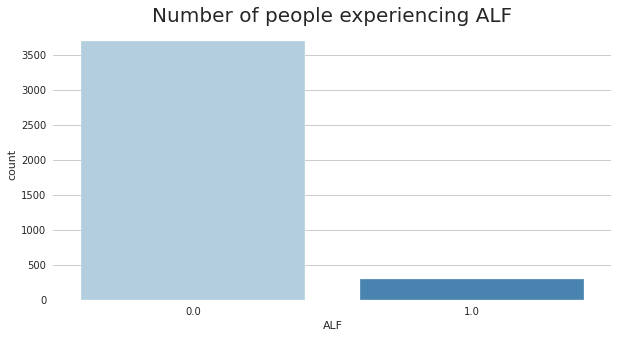

In [ ]:
fig = plt.figure(figsize = (10, 5))
ax = sns.countplot(y_train, palette = "Blues")
plt.title("Number of people experiencing ALF", fontsize = 20)
plt.show()

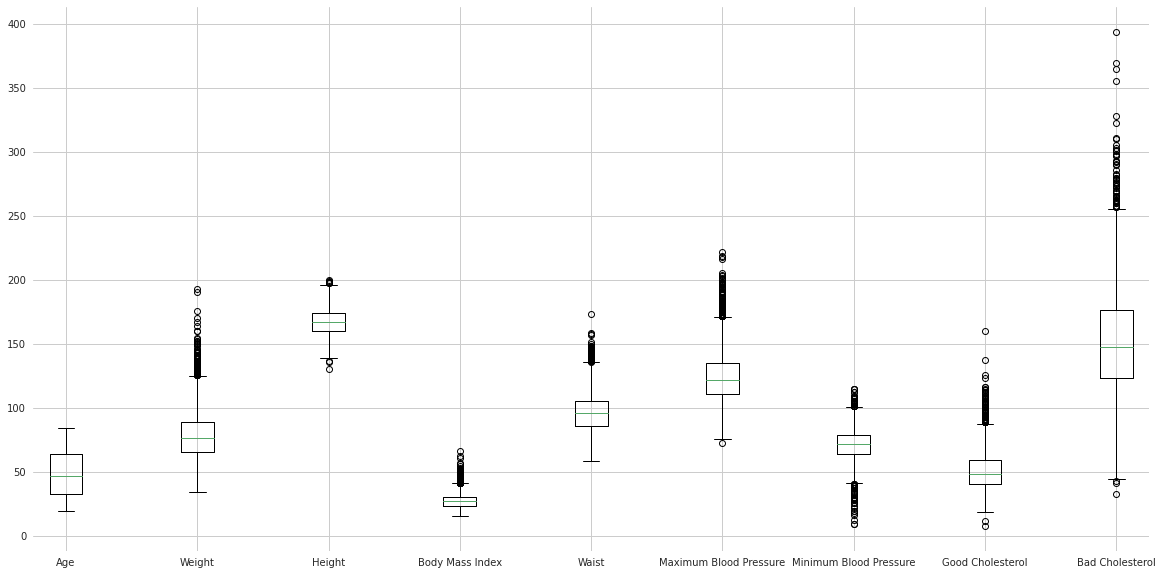

In [ ]:
init = 0
cont = ['Age', 'Weight', 'Height', 'Body Mass Index',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol']
dd = [X_train[col] for col in cont]
ticks = [col for col in cont]
plt.figure(figsize = (20, 10))
plt.boxplot(dd, positions = np.arange(0, len(ticks) * 2, 2))

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.show()

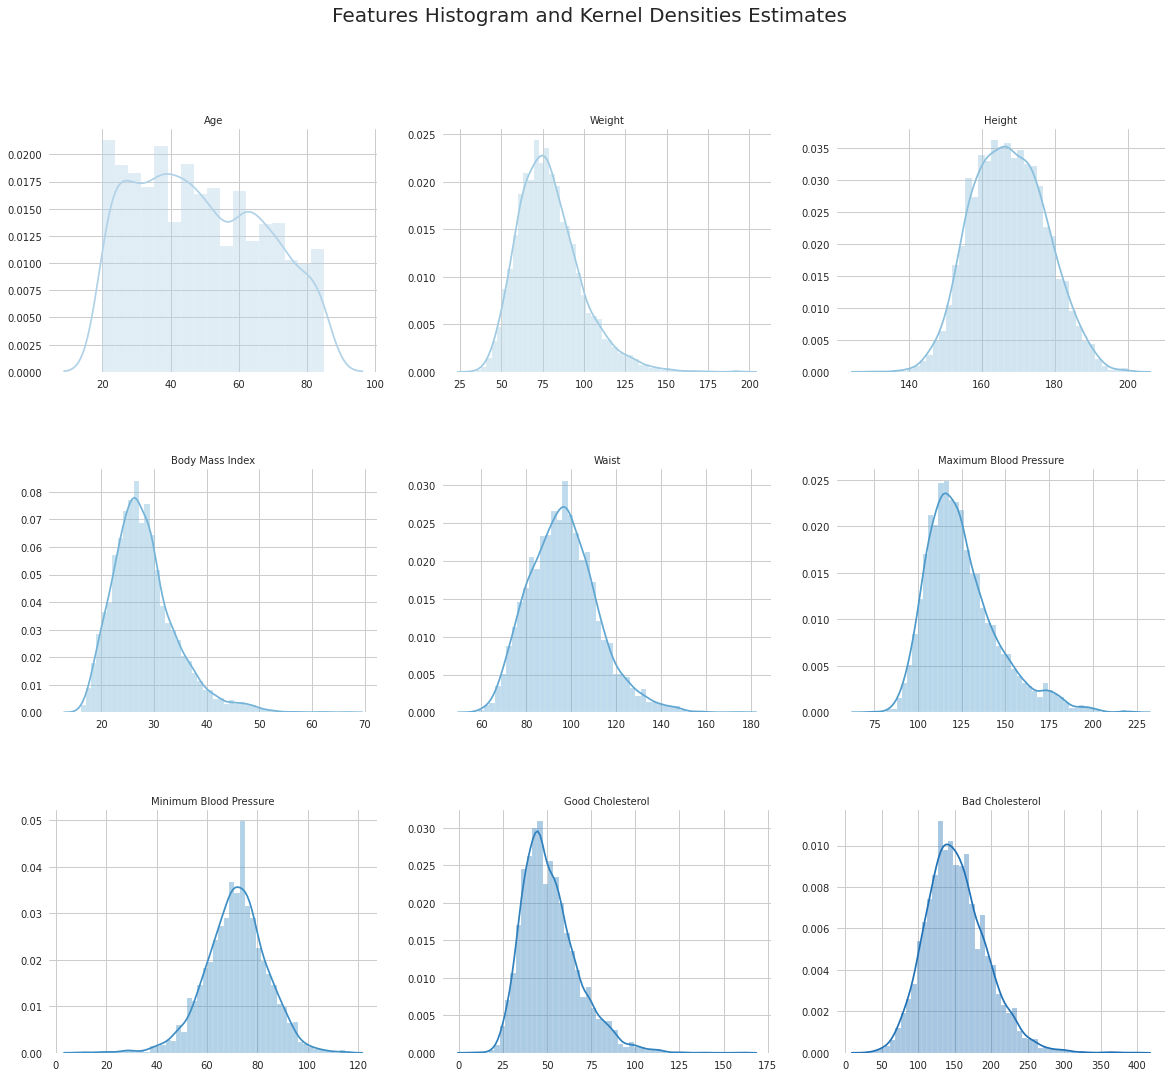

In [ ]:
nrows= 3
ncols= 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 17))
plt.subplots_adjust(hspace=0.4)
cont_features = X_train[['Age', 'Weight', 'Height', 'Body Mass Index',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol']]
for row in range(nrows):
    for col in range(ncols):
        i = ncols * row + col
        feature = cont_features.columns[i]
        sns.distplot(cont_features[feature].dropna(), hist=True, kde=True, rug=False, ax=ax[row,col], axlabel=False, color = colors[i+4])
        ax[row,col].set_title(label=feature, fontsize=10)
plt.suptitle('Features Histogram and Kernel Densities Estimates', fontsize = 20)
plt.show()

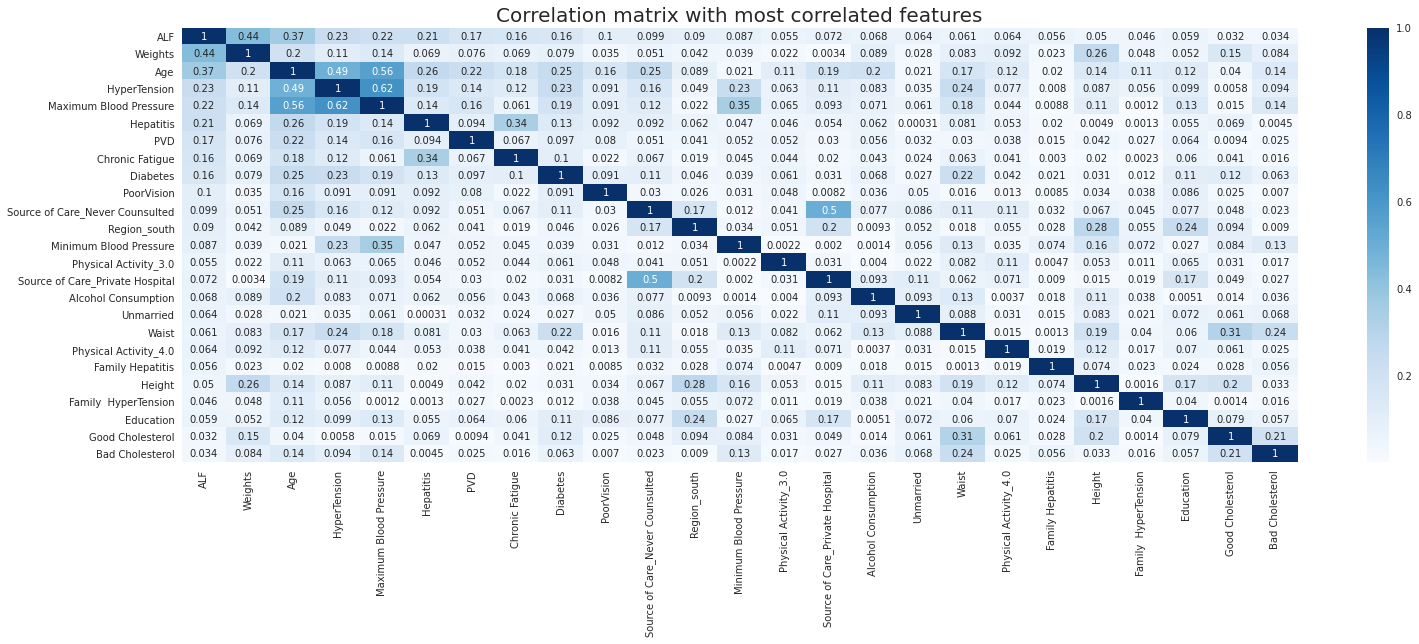

In [ ]:
corr = train.corr().abs()
target = corr["ALF"]
highest = target.sort_values(ascending = False)[:25].index
corr_highest = data[[ind for ind in highest]].corr().abs()


plt.figure(figsize=(25,8))
sns.heatmap(corr_highest, annot = True, cmap = cmap )
plt.title("Correlation matrix with most correlated features", fontsize = 20)
plt.show()

In [ ]:
print(y_train.value_counts())
#if show:
#  print(X_train[y_train == 0.0].describe())
#  print(X_train[y_train == 1.0].describe())

0.0    3696
1.0     295
Name: ALF, dtype: int64


In [ ]:
index_weights = list(X_train.columns.values).index("Weights")
index_gender = list(X_train.columns.values).index("Gender_F")
index_age = list(X_train.columns.values).index("Age")

print(f"Index gender: {index_gender}")
print(f"Index weights: {index_weights}")
print(f"Index age: {index_age}")

Index gender: 26
Index weights: 33
Index age: 0


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = np.concatenate((scaler.fit_transform(X_train[cont]), np.array(X_train.drop(cont, axis = 1))), axis =1)
X_test = np.concatenate((scaler.fit_transform(X_test[cont]), np.array(X_test.drop(cont, axis = 1))), axis =1)

## Outlier Deletion


In [ ]:
# Isolation Forest ----

clf = IsolationForest(random_state=0, max_features = 3, max_samples=1500)
eliminate_train = clf.fit_predict(X_train)
eliminate_test = clf.predict(X_test)

print(f'Outliers detected are: {sum(eliminate_train == -1)}')
X_train = X_train[eliminate_train != -1, :]
y_train = y_train[eliminate_train != -1]
X_test = X_test[eliminate_test != -1, :]
y_test = y_test[eliminate_test != -1]

print(f'Train Dataframe Length: {X_train.shape[0]}')

Outliers detected are: 485
Train Dataframe Length: 3506


In [ ]:
weights = X_train[:, 33]
print(weights)
X_train = np.delete(X_train,33,1)
X_test = np.delete(X_test,33,1)

[0.9 1.2 0.9 ... 0.9 1.2 1.2]


In [ ]:
X_train.shape

(3506, 33)

# Train the model


#### Untuned models performance

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=False)

In [ ]:
from sklearn.metrics import recall_score
def random_classif(y_test):
    y_pred = np.random.choice([0,1], size=y_test.shape)
    return recall_score(y_test, y_pred)
print('If we run a random picker, we get a sensitivity of', random_classif(y_test))
from sklearn.metrics import accuracy_score

def random_classif_acc(y_test):
    y_pred = np.random.choice([0,1], size=y_test.shape)
    return accuracy_score(y_test, y_pred)
print('If we run a random picker, we get an accuracy of', random_classif_acc(y_test))

def model_test_classifier(X_train, y_train, cvnum=10):
    
    scores = {}

    #Logistic Regression model
    log_reg = LogisticRegression( class_weight = "balanced", max_iter=1000)
    log_reg_scores = cross_val_score(log_reg, X_train, y_train, scoring='recall', cv=kf)
    mean_log_reg = log_reg_scores.mean()
    scores['LogisticRegression'] = mean_log_reg

    #RandomForestClassifier
    rndfor_clf = RandomForestClassifier(max_depth = 4)
    imba_pipeline = make_pipeline(SMOTE(random_state=42), rndfor_clf)
    rnd_for_clf_scores = cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)
    mean_rnd_for_clf = rnd_for_clf_scores.mean()
    scores['RandomForestClassifier'] = mean_rnd_for_clf

    #SVMClassifier
    svm_clf = SVC()
    imba_pipeline = make_pipeline(SMOTE(random_state=42), svm_clf)
    svm_clf_scores = cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)
    mean_svm_clf = svm_clf_scores.mean()
    scores['SVMClassifier'] = mean_svm_clf
    
    #KNNClassifier
    knn_clf = KNeighborsClassifier()
    imba_pipeline = make_pipeline(SMOTE(random_state=42), knn_clf)
    knn_clf_scores = cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)
    mean_knn_clf = knn_clf_scores.mean()
    scores['KNNClassifier'] = mean_knn_clf
    
    #MultiLinearPerceptron
    mlp_clf = MLPClassifier(max_iter = 1000)
    imba_pipeline = make_pipeline(SMOTE(random_state=42), mlp_clf)
    mlp_clf_scores = cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)
    mean_mlp_clf = mlp_clf_scores.mean()
    scores['MLPClassifier'] = mean_mlp_clf
    return scores



If we run a random picker, we get a sensitivity of 0.6071428571428571
If we run a random picker, we get an accuracy of 0.4908485856905158


In [ ]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#scores_untuned_classif = model_test_classifier(X_train, y_train)
#print(scores_untuned_classif)

## Dimensionality Reduction

The number of starting variables is: 33 




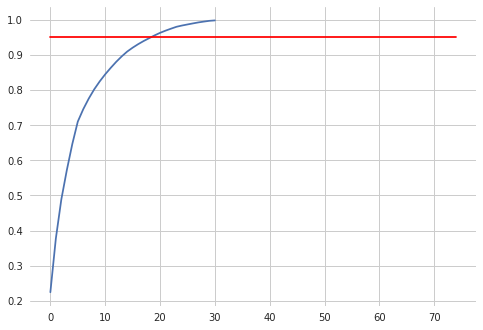

Variables needed for  95 %:  20


In [ ]:
from sklearn.decomposition import PCA
def PCA_plot(dataframe, var_optimal=.95, show=True, show1=False):
    n = dataframe.shape[1]
    if show:
        print('The number of starting variables is:', n, 2*'\n')
    pca_plot = PCA(n_components=n)
    pca_plot.fit(dataframe)
    expl_var = pca_plot.explained_variance_ratio_
    if show1:
        print(expl_var)
    expl_var = np.array([sum(expl_var[:i]) for i in range(1, n-1)])
    if show:
        plt.plot(expl_var)
    n_needed = np.argwhere(expl_var > var_optimal)[0, 0] + 1
    if show:
        plt.plot([0,74], [var_optimal, var_optimal], c='red')
        plt.show()
    if show:
        print('Variables needed for ',str(int(var_optimal*100)),'%: ', n_needed)
    return n_needed
    
n = PCA_plot(X_train, .95, show)

## Tuning the Model


#### Confusion Matrix

In [ ]:
def plot_conf_matrix(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  predicted_class = model.predict(X_test)
  cm1 = confusion_matrix(y_test,predicted_class, labels = [0,1])
  print('Confusion Matrix : \n', cm1)

  total1=sum(sum(cm1))
  #####from confusion matrix calculate accuracy
  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy : ', accuracy1)

  precision1 = cm1[1,1]/(cm1[1,1]+cm1[0,1])
  print('Precision : ', precision1)

  sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Sensitivity : ', sensitivity1 )

  specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Specificity : ', specificity1)

  

In [ ]:
def plot_conf_matrix_weighted(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train, sample_weight = weights)
  predicted_class = model.predict(X_test)
  cm1 = confusion_matrix(y_test,predicted_class, labels = [0,1])
  print('Confusion Matrix : \n', cm1)

  total1=sum(sum(cm1))
  #####from confusion matrix calculate accuracy
  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy : ', accuracy1)

  precision1 = cm1[1,1]/(cm1[1,1]+cm1[0,1])
  print('Precision : ', precision1)

  sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Sensitivity : ', sensitivity1 )

  specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Specificity : ', specificity1)
  



In [ ]:
plot_conf_matrix_weighted(LogisticRegression(random_state = 0,class_weight="balanced"), X_train, y_train, X_test, y_test)

Confusion Matrix : 
 [[882 264]
 [  8  48]]
Accuracy :  0.7737104825291181
Precision :  0.15384615384615385
Sensitivity :  0.8571428571428571
Specificity :  0.7696335078534031


#### Learning curves


In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, 
                                                            X=X, 
                                                            y=y,
                                                            random_state=0, 
                                                            cv=5, 
                                                            train_sizes=np.linspace(.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.style.use('seaborn')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    plt.legend()
    print(f"Last accuracy:{test_scores_mean[-1]}")
    return plt.show()

#### Logistic Regression

Last accuracy:0.8080422351463721


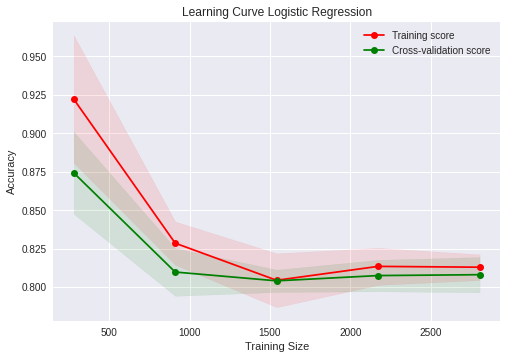

In [ ]:
log_reg = LogisticRegression(random_state=0, max_iter = 1000, class_weight="balanced")

plot_learning_curve(log_reg, X_train, y_train, title="Learning Curve Logistic Regression")

In [ ]:
logreg = LogisticRegression(random_state=0, max_iter = 1000, class_weight = "balanced", solver='lbfgs')

param_grid = [{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,2,3,4, 5, 10, 20, 40, 70, 100, 110, 120, 130, 140, 150, 160]}]

grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring= "recall")

grid_search_logreg.fit(X_train, y_train, sample_weight = weights)

param_logreg = grid_search_logreg.best_params_

logreg_C = param_logreg['C']

print(param_logreg)
print('\n')
#print('The best accuracy score obtained is:', grid_search_logreg.best_score_) 

{'C': 0.001}




Last accuracy:0.775530276243543


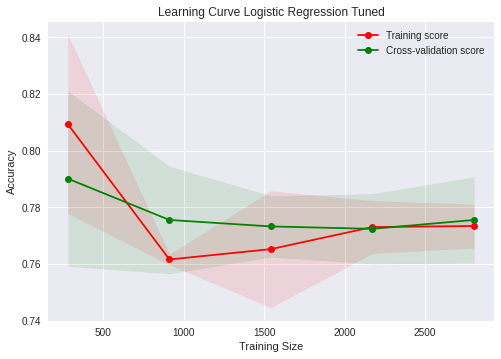

['log_reg_opt.sav']

In [ ]:
import joblib
from joblib import Memory
log_reg_opt = LogisticRegression(random_state=0, class_weight = "balanced", max_iter = 1000, solver='lbfgs', C=logreg_C)

plot_learning_curve(log_reg_opt, X_train, y_train, title="Learning Curve Logistic Regression Tuned")

log_reg_alf = 'log_reg_opt.sav'
joblib.dump(log_reg_opt, log_reg_alf)
 

In [ ]:
plot_conf_matrix_weighted(log_reg_opt, X_train, y_train, X_test, y_test)

Confusion Matrix : 
 [[793 353]
 [  5  51]]
Accuracy :  0.7021630615640599
Precision :  0.12623762376237624
Sensitivity :  0.9107142857142857
Specificity :  0.6919720767888308


#### Polynomial Logistic Regression

Last accuracy:0.8845637204189835


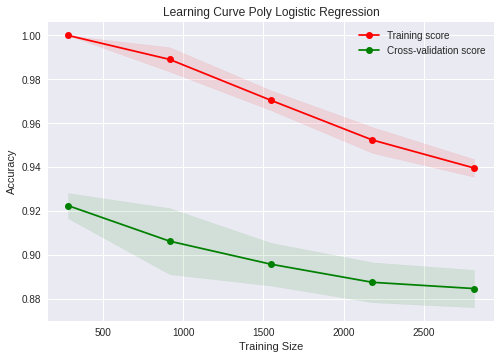

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_log_reg = Pipeline((('poly_features', PolynomialFeatures(degree=2, include_bias=False)), 
                            ('poly_log_reg', LogisticRegression(random_state=0, max_iter=100000, class_weight="balanced"))))

plot_learning_curve(polynomial_log_reg, X_train, y_train, title="Learning Curve Poly Logistic Regression")

In [ ]:
polyfeatures = PolynomialFeatures(include_bias=False)
polylogreg = LogisticRegression(random_state=0, max_iter=1000, class_weight="balanced")

polynomial_logreg = Pipeline(steps=[('polyfeatures', polyfeatures), ('polylogreg', polylogreg)])

param_grid = [{'polyfeatures__degree': [1, 2], 'polylogreg__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]}]

grid_search_polylogreg = GridSearchCV(polynomial_logreg, param_grid, iid=False, cv=5, scoring="recall",
                           return_train_score=False)

grid_search_polylogreg.fit(X_train, y_train, polylogreg__sample_weight = weights)

param_polynomial_logreg = grid_search_polylogreg.best_params_

logreg_poly_degrees, logreg_C = param_polynomial_logreg['polyfeatures__degree'], param_polynomial_logreg['polylogreg__C']

print(param_polynomial_logreg)
print('\n')
print('The best accuracy score obtained is:', grid_search_polylogreg.best_score_)

{'polyfeatures__degree': 1, 'polylogreg__C': 0.001}


The best accuracy score obtained is: 0.9390390390390391


Last accuracy:0.7580398131384973


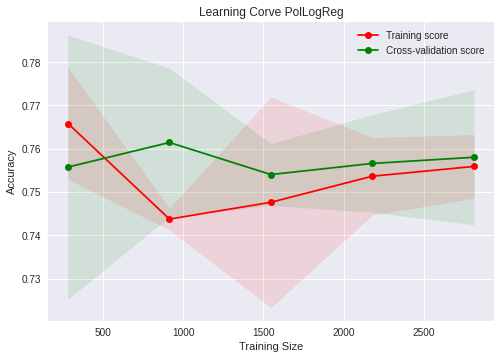

['polynomial_log_reg_opt.sav']

In [ ]:
polynomial_log_reg_opt = Pipeline((('poly_features', PolynomialFeatures(degree=logreg_poly_degrees, include_bias=False)), 
                            ('poly_log_reg', LogisticRegression(random_state=0, solver='lbfgs', C=logreg_C, max_iter = 1000, class_weight="balanced"))))
plot_learning_curve(polynomial_log_reg_opt, X_train, y_train, title= "Learning Corve PolLogReg")
polynomial_log_reg_alf = 'polynomial_log_reg_opt.sav'
joblib.dump(polynomial_log_reg_opt, polynomial_log_reg_alf)


In [ ]:
plot_conf_matrix(polynomial_log_reg_opt, X_train, y_train, X_test, y_test)

Confusion Matrix : 
 [[834 299]
 [  7  49]]
Accuracy :  0.7426408746846089
Precision :  0.14080459770114942
Sensitivity :  0.875
Specificity :  0.736098852603707


#### XGB Classifier

(3517, 33)
Last accuracy:0.9269312524246734


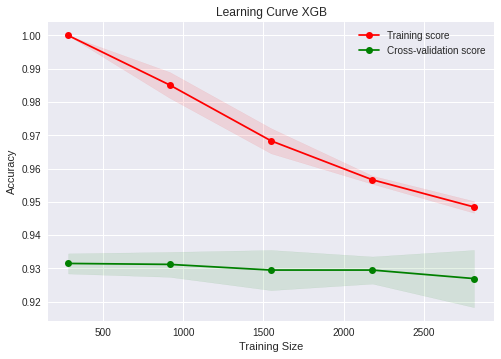

In [ ]:
xgb_clf = XGBClassifier(random_state=0)
imba_pipeline = make_pipeline(SMOTE(random_state=42), xgb_clf)
print(X_train.shape)
plot_learning_curve(imba_pipeline, X_train, y_train, title="Learning Curve XGB")

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)
data_F = X_res[X_res[:,26]==1].shape[0]
data_M = X_res[X_res[:,26]==0].shape[0]
sick = X_res[y_res == 1]
sick_F = sick[sick[:,26]==1].shape[0]
sick_M = sick[sick[:,26]==0].shape[0]
print(sick.shape[0]/X_res.shape[0])
print(f"With oversampling the number of women is {list(X_res[:,26]).count(1)}")
print(f"With oversampling the proportion of women is {list(X_res[:,26]).count(1)/X_res.shape[0]}")
print(f"With oversampling the number of men is {list(X_res[:,26]).count(0)}")
print(f"The portion of sick women is {sick_F/X_res.shape[0]}")
print(f"The portion of sick men is {sick_M/X_res.shape[0]}")

0.5
With oversampling the number of women is 2860
With oversampling the proportion of women is 0.4286570743405276
With oversampling the number of men is 3306
The portion of sick women is 0.18615107913669066
The portion of sick men is 0.23800959232613908


In [ ]:
weights.shape

(3517,)

In [ ]:
X_train.shape

(3517, 33)

In [ ]:

xgbclf = XGBClassifier(random_state=0, verbose=0, learning_rate_init=0.2, subsample=0.8, colsample_bytree=0.8)
imba_pipeline = make_pipeline(SMOTE(random_state=42), xgbclf)
param_grid = [{'xgbclassifier__max_depth': [4, 5, 6], 'xgbclassifier__reg_lambda': [25, 50, 75, 100, 1000], 'xgbclassifier__gamma': [0, 0.001, 0.005, 0.01], 
               'xgbclassifier__min_child_weight': [1, 2, 3]}]
#new_params = {'xgbclassifier__' + key: param_grid[key] for key in param_grid}
grid_search_xgbclf = GridSearchCV(imba_pipeline, param_grid, cv=kf, scoring="recall", return_train_score=True)

grid_search_xgbclf.fit(X_train, y_train)

xgbclf_param = grid_search_xgbclf.best_params_

xgb_max_depth, xgb_lambda, xbg_gamma = xgbclf_param['xgbclassifier__max_depth'], xgbclf_param['xgbclassifier__reg_lambda'], xgbclf_param['xgbclassifier__gamma']
xgb_min_child_weight = xgbclf_param['xgbclassifier__min_child_weight']

print(xgbclf_param)
print('\n')
#print('The best Accuracy score obtained is:', grid_search_xgbclf.best_score_)

{'xgbclassifier__gamma': 0, 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__reg_lambda': 1000}




Last accuracy:0.8427712401396612


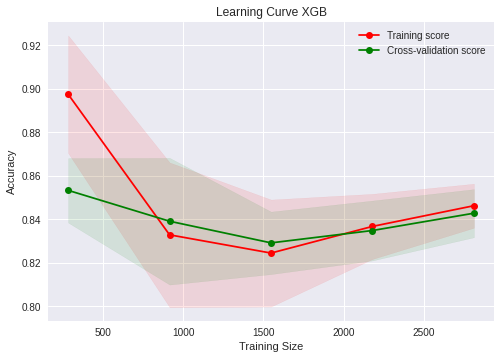

['xgb_clf_opt.sav']

In [ ]:
xgb_clf_opt =  make_pipeline(SMOTE(random_state=42), XGBClassifier(random_state=0, verbose=0, learning_rate=0.05, max_depth=xgb_max_depth, reg_lambda=xgb_lambda,
                            gamma=xbg_gamma, min_child_weight=xgb_min_child_weight, subsample=0.8, colsample_bytree=0.8))
plot_learning_curve(xgb_clf_opt, X_train, y_train, title="Learning Curve XGB")
xgb_clf_alf = 'xgb_clf_opt.sav'
joblib.dump(xgb_clf_opt, xgb_clf_alf)

In [ ]:
plot_conf_matrix(xgb_clf_opt, X_train, y_train, X_test, y_test)

Confusion Matrix : 
 [[938 195]
 [  9  47]]
Accuracy :  0.8284272497897393
Precision :  0.19421487603305784
Sensitivity :  0.8392857142857143
Specificity :  0.8278905560458959


#### KNN

Last accuracy:0.7793571382387171


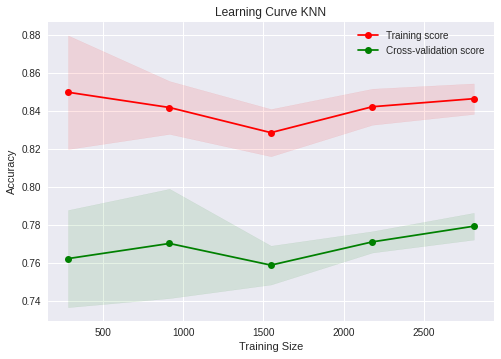

In [ ]:
knn_clf = KNeighborsClassifier()
imba_pipeline = make_pipeline(SMOTE(random_state=42), knn_clf)
plot_learning_curve(imba_pipeline, X_train, y_train, title="Learning Curve KNN")

In [ ]:
knnclf = KNeighborsClassifier()
imba_pipeline = make_pipeline(SMOTE(random_state=42), knnclf)
param_grid = [{'kneighborsclassifier__n_neighbors': [5, 6, 7, 8, 9, 10], 'kneighborsclassifier__leaf_size': [10, 20, 30, 40, 70, 100]}]

grid_search_knn = GridSearchCV(imba_pipeline, param_grid, cv=kf, scoring= "recall",  return_train_score=True)

grid_search_knn.fit(X_train, y_train)

param_knn = grid_search_knn.best_params_

n_neighbors, leaf_size = param_knn['kneighborsclassifier__n_neighbors'], param_knn["kneighborsclassifier__leaf_size"]

print(param_knn)
print('\n')
#print('The best accuracy score obtained is:', grid_search_logreg.best_score_) 

{'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__n_neighbors': 9}




Last accuracy:0.7432468802534592


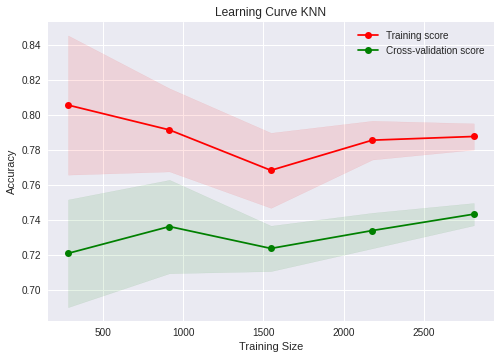

['knn_clf_opt.sav']

In [ ]:
knn_clf_opt = make_pipeline(SMOTE(random_state=42),KNeighborsClassifier(leaf_size=leaf_size, n_neighbors=n_neighbors))
plot_learning_curve(knn_clf_opt, X_train, y_train, title="Learning Curve KNN")
knn_clf_alf = 'knn_clf_opt.sav'
joblib.dump(knn_clf_opt, knn_clf_alf)

In [ ]:
plot_conf_matrix(knn_clf_opt, X_train, y_train, X_test, y_test)

Confusion Matrix : 
 [[842 291]
 [  8  48]]
Accuracy :  0.7485281749369218
Precision :  0.1415929203539823
Sensitivity :  0.8571428571428571
Specificity :  0.7431597528684908


#### Random Forest 

In [ ]:
X_train.T.shape

(33, 3517)

Last accuracy:0.940290395060132


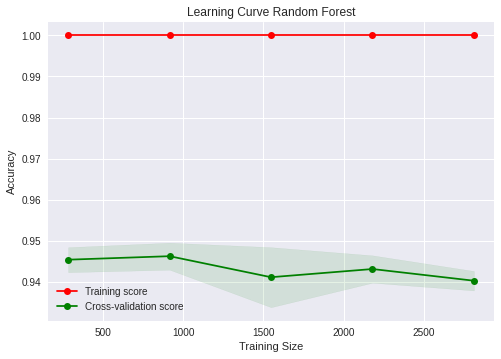

In [ ]:
#X_train = np.column_stack([X_train, weights])
rnd_for_clf =RandomForestClassifier(random_state=0)
sm = SMOTE(random_state=42)
imba_pipeline = make_pipeline(sm, rnd_for_clf)
#X_res, y_res = sm.fit_sample(X_train, y_train)
#weights_rnd_for = X_res[:,33]
#X_train = np.delete(X_train,33,1)
plot_learning_curve(imba_pipeline, X_train, y_train, title = "Learning Curve Random Forest")

In [ ]:
#weights_rnd_for.shape
#X_res.shape

In [ ]:
rndforclf = RandomForestClassifier(random_state=0, n_estimators=50)
imba_pipeline = make_pipeline(sm, rndforclf)
#max_n = X_train.shape[1]

param_grid = [{'randomforestclassifier__max_depth': [3,4 ,5], 'randomforestclassifier__min_samples_leaf': [3, 4, 5], 'randomforestclassifier__min_samples_split': [10, 15, 20], 
               'randomforestclassifier__max_leaf_nodes': [20, 30, 40], 'randomforestclassifier__max_features': [5, 10, 15]}]

grid_search_rndfor_clf = GridSearchCV(imba_pipeline, param_grid, iid=False, cv=kf, scoring="recall", return_train_score=True)

grid_search_rndfor_clf.fit(X_train, y_train)

param_rndfor_clf = grid_search_rndfor_clf.best_params_

rnd_max_depth, rnd_min_samples_leaf = param_rndfor_clf['randomforestclassifier__max_depth'], param_rndfor_clf['randomforestclassifier__min_samples_leaf']
rnd_min_samples_split, rnd_max_leaf_nodes = param_rndfor_clf['randomforestclassifier__min_samples_split'], param_rndfor_clf['randomforestclassifier__max_leaf_nodes']
rnd_max_features = param_rndfor_clf['randomforestclassifier__max_features']

print(param_rndfor_clf)
print('\n')
#print('The best accuracy score obtained is:', grid_search_rndfor_clf.best_score_)

{'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__max_leaf_nodes': 20, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__min_samples_split': 10}




In [ ]:
rnd_for_clf_opt = make_pipeline(SMOTE(random_state=42),RandomForestClassifier(n_estimators=500, random_state=0, max_depth=rnd_max_depth,
                                     min_samples_leaf=rnd_min_samples_leaf, min_samples_split=rnd_min_samples_split,
                                     max_features=rnd_max_features, max_leaf_nodes=rnd_max_leaf_nodes))

#plot_learning_curve(rnd_for_clf_opt, X_train, y_train, title = "Learning Curve Random Forest")
rnd_for_clf_alf = 'rnd_for_clf_opt.sav'
joblib.dump(rnd_for_clf_opt, rnd_for_clf_alf)

['rnd_for_clf_opt.sav']

In [ ]:
plot_conf_matrix(rnd_for_clf_opt, X_train, y_train, X_test, y_test)

Confusion Matrix : 
 [[939 194]
 [ 12  44]]
Accuracy :  0.8267451640033642
Precision :  0.18487394957983194
Sensitivity :  0.7857142857142857
Specificity :  0.8287731685789939


#### Ensemble

In [ ]:
show1 = False

In [ ]:
models_classif = [('LogisticRegression', log_reg_opt), ('PolynomialLogisticRegression', polynomial_log_reg_opt), 
                  ('RandomForestClassifier', rnd_for_clf_opt), ('XGBClassifier', xgb_clf_opt), ('KNN', knn_clf_opt)]

if show1:
    for i in models_classif:
        print(i[0], ':', i[1])

In [ ]:
def model_eval_classif(models, X_train, y_train, X_test, y_test, ordered=True):
    d = {}
    y_test_vals = y_test.values
    order = [i for i in range(len(y_test_vals))]
    if ordered:
        order = np.argsort(y_test_vals)
    for i in models:
        i[1].fit(X_train, y_train)
        y_pred = i[1].predict(X_test)
        plt.plot(y_test_vals[order], 'go', markersize=12)
        plt.plot(y_pred[order], 'ro')
        plt.title('Original(Green) vs. ' + i[0] + '(Red)')
        plt.show()
        d[i[0]] = accuracy_score(y_test_vals, y_pred)
    return d

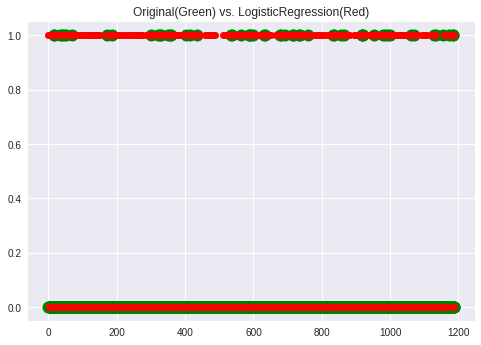

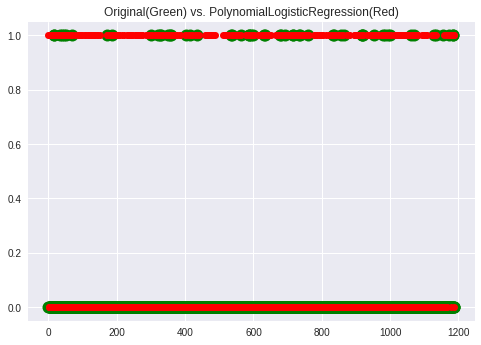

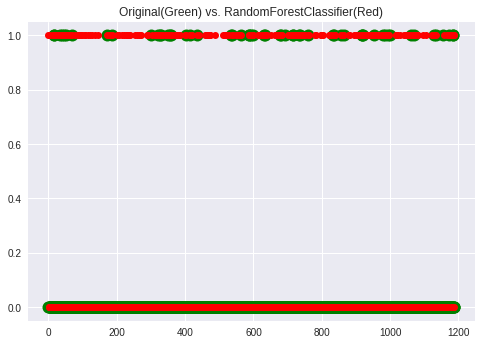

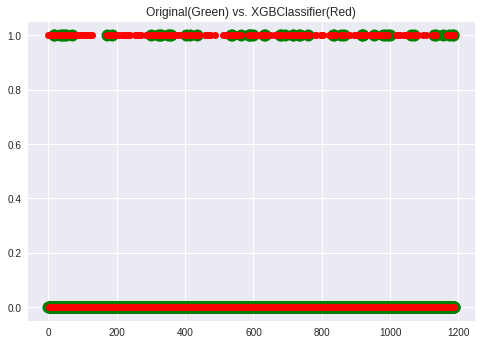

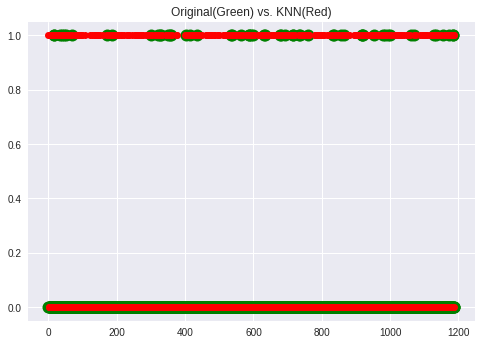

{'LogisticRegression': 0.7426408746846089, 'PolynomialLogisticRegression': 0.7426408746846089, 'RandomForestClassifier': 0.8267451640033642, 'XGBClassifier': 0.8284272497897393, 'KNN': 0.7485281749369218}


In [ ]:
d = model_eval_classif(models_classif, X_train, y_train, X_test, y_test, ordered=False)

print(d)

In [ ]:
selected_models_classif = [('PolynomialLogisticRegression', polynomial_log_reg_opt), ('RandomForestClassifier', rnd_for_clf_opt), ('XGBClassifier', xgb_clf_opt)]
voting_clf = VotingClassifier(estimators=selected_models_classif, voting='soft')
voting_clf = make_pipeline(SMOTE(random_state=42), voting_clf)
final_models_clf = selected_models_classif + [('VotingClassifier', voting_clf)] 

In [ ]:
plot_conf_matrix(voting_clf, X_train, y_train, X_test, y_test)


Confusion Matrix : 
 [[913 220]
 [  9  47]]
Accuracy :  0.8074011774600505
Precision :  0.1760299625468165
Sensitivity :  0.8392857142857143
Specificity :  0.8058252427184466


In [ ]:
plot_conf_matrix_weighted(log_reg_opt, X_train, y_train, X_test, y_test)
for m in final_models_clf:
  print(m[0])
  plot_conf_matrix(m[1], X_train, y_train, X_test, y_test)
  print('\n')

Confusion Matrix : 
 [[685 448]
 [  1  55]]
Accuracy :  0.6223717409587889
Precision :  0.10934393638170974
Sensitivity :  0.9821428571428571
Specificity :  0.6045895851721095
PolynomialLogisticRegression
Confusion Matrix : 
 [[834 299]
 [  7  49]]
Accuracy :  0.7426408746846089
Precision :  0.14080459770114942
Sensitivity :  0.875
Specificity :  0.736098852603707


RandomForestClassifier
Confusion Matrix : 
 [[939 194]
 [ 12  44]]
Accuracy :  0.8267451640033642
Precision :  0.18487394957983194
Sensitivity :  0.7857142857142857
Specificity :  0.8287731685789939


XGBClassifier
Confusion Matrix : 
 [[938 195]
 [  9  47]]
Accuracy :  0.8284272497897393
Precision :  0.19421487603305784
Sensitivity :  0.8392857142857143
Specificity :  0.8278905560458959


VotingClassifier
Confusion Matrix : 
 [[913 220]
 [  9  47]]
Accuracy :  0.8074011774600505
Precision :  0.1760299625468165
Sensitivity :  0.8392857142857143
Specificity :  0.8058252427184466




In [ ]:
gender_column = 26 #any number

X_test_M = X_test[X_test[:, gender_column] == 0, :]
y_test_M = y_test[X_test[:, gender_column] == 0]
assert len(X_test_M) == len(y_test_M), 'Equal Sizes'

X_test_F = X_test[X_test[:, gender_column] == 1, :]
y_test_F = y_test[X_test[:, gender_column] == 1]
assert len(X_test_F) == len(y_test_F), 'Equal Sizes'

###### Based on the optimization above, I would conclude that Logistic Regression should be used for the prediction of ALF, as it provides a good balance between high sensitivity (most important in Medical Diagnosis), high accuracy and does not compromise the level of specificity as much as the others. For this reason now the focus of reduction of bias based on fairness criteria "Sensitivity" will focus explicity on Logistic Regression


## Sensitivity Analysis

In [ ]:
print(pd.DataFrame({"features":train.drop(["ALF", "Weights"], axis = 1).columns.values, "importance":rnd_for_clf_opt.named_steps['randomforestclassifier'].feature_importances_}).sort_values("importance", ascending = False))
#print(list(zip(X_train, rnd_for_clf_opt.named_steps['randomforestclassifier'].feature_importances_)))

                               features  importance
0                                   Age    0.476785
16                         HyperTension    0.206254
28                         Region_south    0.094084
17                 Family  HyperTension    0.055907
5                                 Waist    0.038102
25      Source of Care_Private Hospital    0.024133
31                Physical Activity_3.0    0.019100
6                Maximum Blood Pressure    0.010875
24      Source of Care_Never Counsulted    0.010567
12                            Education    0.009966
22                      Chronic Fatigue    0.009943
20                            Hepatitis    0.009338
27                         Region_north    0.008865
18                             Diabetes    0.004559
19                      Family Diabetes    0.003213
15                  Alcohol Consumption    0.002372
13                            Unmarried    0.002259
30                Physical Activity_2.0    0.002185
11          

In [ ]:
print(list(zip(train.columns.tolist(),log_reg_opt.coef_[0])))

[('Age', 0.6059746732829214), ('Weight', -0.03360924409038408), ('Height', -0.10941517155877821), ('Body Mass Index', 0.023473810300874098), ('Obesity', 0.0519844725818808), ('Waist', 0.18808300178764634), ('Maximum Blood Pressure', -0.15811353902129435), ('Minimum Blood Pressure', -0.0014155901904806564), ('Good Cholesterol', 0.04397281201594256), ('Bad Cholesterol', 0.011200007573566845), ('Dyslipidemia', -0.030538335680575818), ('PVD', 0.03226167106399752), ('Education', 0.0027374660408445045), ('Unmarried', 0.06382247566482159), ('PoorVision', -0.01666628333944582), ('Alcohol Consumption', -0.00466736459755863), ('HyperTension', 0.15495070774959546), ('Family  HyperTension', -0.058236086166484013), ('Diabetes', 0.053572799674360676), ('Family Diabetes', 0.010316354595199733), ('Hepatitis', 0.044103258738394), ('Family Hepatitis', 0.022084044562845517), ('Chronic Fatigue', 0.04534739502018134), ('Source of Care_Governament Hospital', -0.02068272164030333), ('Source of Care_Never Cou

In [ ]:
Odds = np.exp(-0.14944555403385756)
print(f" The odds of female having ALF to male having ALF are {Odds}")


 The odds of female having ALF to male having ALF are 0.8611853248103282


## Bias Discovery


#### Male Segment

In [ ]:
def plot_conf_matrix_subset(model, X_test, y_test):
  predicted_class = model.predict(X_test)
  cm1 = confusion_matrix(y_test,predicted_class, labels = [0,1])
  print('Confusion Matrix : \n', cm1)

  total1=sum(sum(cm1))
  #####from confusion matrix calculate accuracy
  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy : ', accuracy1)

  precision1 = cm1[1,1]/(cm1[1,1]+cm1[0,1])
  print('Precision : ', precision1)

  sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Sensitivity : ', sensitivity1 )

  specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Specificity : ', specificity1)

In [ ]:
print("LogisticRegression")
plot_conf_matrix_subset(log_reg_opt, X_test_M, y_test_M)

LogisticRegression
Confusion Matrix : 
 [[390 203]
 [  3  29]]
Accuracy :  0.6704
Precision :  0.125
Sensitivity :  0.90625
Specificity :  0.657672849915683


In [ ]:
print("LogisticRegression")
plot_conf_matrix_subset(log_reg_opt, X_test_M, y_test_M)
print('\n')
for m in final_models_clf:
  print(m[0])
  plot_conf_matrix_subset(m[1], X_test_M, y_test_M)
  print('\n')

LogisticRegression
Confusion Matrix : 
 [[343 245]
 [  1  30]]
Accuracy :  0.6025848142164781
Precision :  0.10909090909090909
Sensitivity :  0.967741935483871
Specificity :  0.5833333333333334


PolynomialLogisticRegression
Confusion Matrix : 
 [[437 151]
 [  4  27]]
Accuracy :  0.7495961227786753
Precision :  0.15168539325842698
Sensitivity :  0.8709677419354839
Specificity :  0.7431972789115646


RandomForestClassifier
Confusion Matrix : 
 [[490  98]
 [  6  25]]
Accuracy :  0.8319870759289176
Precision :  0.2032520325203252
Sensitivity :  0.8064516129032258
Specificity :  0.8333333333333334


XGBClassifier
Confusion Matrix : 
 [[493  95]
 [  5  26]]
Accuracy :  0.8384491114701131
Precision :  0.21487603305785125
Sensitivity :  0.8387096774193549
Specificity :  0.8384353741496599


VotingClassifier
Confusion Matrix : 
 [[482 106]
 [  5  26]]
Accuracy :  0.8206785137318255
Precision :  0.19696969696969696
Sensitivity :  0.8387096774193549
Specificity :  0.8197278911564626




#### FEMALE SEGMENT


In [ ]:
print("LogisticRegression")
plot_conf_matrix_subset(log_reg_opt, X_test_F, y_test_F)
print('\n')
for m in final_models_clf:
  print(m[0])
  plot_conf_matrix_subset(m[1], X_test_F, y_test_F)
  print('\n')

LogisticRegression
Confusion Matrix : 
 [[342 203]
 [  0  25]]
Accuracy :  0.643859649122807
Precision :  0.10964912280701754
Sensitivity :  1.0
Specificity :  0.6275229357798165


PolynomialLogisticRegression
Confusion Matrix : 
 [[397 148]
 [  3  22]]
Accuracy :  0.7350877192982456
Precision :  0.12941176470588237
Sensitivity :  0.88
Specificity :  0.728440366972477


RandomForestClassifier
Confusion Matrix : 
 [[449  96]
 [  6  19]]
Accuracy :  0.8210526315789474
Precision :  0.16521739130434782
Sensitivity :  0.76
Specificity :  0.8238532110091743


XGBClassifier
Confusion Matrix : 
 [[445 100]
 [  4  21]]
Accuracy :  0.8175438596491228
Precision :  0.17355371900826447
Sensitivity :  0.84
Specificity :  0.8165137614678899


VotingClassifier
Confusion Matrix : 
 [[431 114]
 [  4  21]]
Accuracy :  0.7929824561403509
Precision :  0.15555555555555556
Sensitivity :  0.84
Specificity :  0.7908256880733945




In [ ]:
print("LogisticRegression")
plot_conf_matrix_subset(log_reg_opt, X_test_F, y_test_F)

LogisticRegression
Confusion Matrix : 
 [[394 150]
 [  2  24]]
Accuracy :  0.7333333333333333
Precision :  0.13793103448275862
Sensitivity :  0.9230769230769231
Specificity :  0.7242647058823529
